# step1 data preprocessing

In [ ]:
'''
author: Yue Pei
time : 10/10/2021
'''
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
# Loading The Data
df_CNN = pd.read_csv("14262_FOX_articles.csv")
df_FOX = pd.read_csv("63488_CNN_articles.csv")
df_CNN.columns = ["Index", "Date", "Title", "Text", "Label", "Site"]
df_FOX.columns = ["Index", "Date", "Title", "Text", "Label", "Site"]

In [ ]:
df_FOX['LeftOrRight'] = 1
df_CNN['LeftOrRight'] = 0

In [ ]:
df_CNN.head()

,Index,Date,Title,Text,Label,Site,LeftOrRight
0,2,2021/10/16,"Psaki, DOJ in damage control mode after Biden ...",The Department of Justice (DOJ) and White Hous...,right,https://www.foxnews.com/politics/psaki-doj-dam...,0
1,3,2021/10/16,Rand Paul: Biden’s ‘Big Government Socialism’ ...,"U.S. Rand Paul, R-Ky., spoke out Friday night ...",right,https://www.foxnews.com/media/rand-paul-biden-...,0
2,4,2021/10/16,Hannity: 'Vile' Joe Biden is proving 'morally ...,"In his ""Opening Monologue"" on Friday, Sean Han...",right,https://www.foxnews.com/media/hannity-vile-joe...,0
3,5,2021/10/16,'Reminiscent of Jan. 6': Violent protesters ar...,Dozens of activists protesting fossil fuel pro...,right,https://www.foxnews.com/politics/reminiscent-o...,0
4,6,2021/10/15,Psaki promises 'to choose my words more carefu...,White House press secretary Jen Psaki promised...,right,https://www.foxnews.com/politics/psaki-promise...,0


In [ ]:
df_FOX.head(5)

,Index,Date,Title,Text,Label,Site,LeftOrRight
0,2,2021/10/07,FDA still without a permanent leader as clock ...,(CNN)The clock is ticking down on the time Pr...,left,https://www.cnn.com/2021/10/07/politics/fda-co...,1
1,3,2021/10/11,Virginia's gubernatorial election is more impo...,(CNN)Virginia Democrat Terry McAuliffe has ad...,left,https://www.cnn.com/2021/10/11/politics/virgin...,1
2,4,2021/10/10,US Capitol Police whistleblower alleges leader...,Washington (CNN)A whistleblower identifying as...,left,https://www.cnn.com/2021/10/10/politics/us-cap...,1
3,5,2021/10/10,US calls talks with Taliban 'candid and profes...,Washington (CNN)The US State Department said S...,left,https://www.cnn.com/2021/10/10/politics/us-tal...,1
4,6,2021/10/10,The Biden administration scramble to tame infl...,(CNN)When the Commerce Department launched an...,left,https://www.cnn.com/2021/10/10/politics/inflat...,1


In [ ]:
df = pd.concat([df_FOX, df_CNN]).reset_index(drop = True)
df

,Index,Date,Title,Text,Label,Site,LeftOrRight
0,2,2021/10/07,FDA still without a permanent leader as clock ...,(CNN)The clock is ticking down on the time Pr...,left,https://www.cnn.com/2021/10/07/politics/fda-co...,1
1,3,2021/10/11,Virginia's gubernatorial election is more impo...,(CNN)Virginia Democrat Terry McAuliffe has ad...,left,https://www.cnn.com/2021/10/11/politics/virgin...,1
2,4,2021/10/10,US Capitol Police whistleblower alleges leader...,Washington (CNN)A whistleblower identifying as...,left,https://www.cnn.com/2021/10/10/politics/us-cap...,1
3,5,2021/10/10,US calls talks with Taliban 'candid and profes...,Washington (CNN)The US State Department said S...,left,https://www.cnn.com/2021/10/10/politics/us-tal...,1
4,6,2021/10/10,The Biden administration scramble to tame infl...,(CNN)When the Commerce Department launched an...,left,https://www.cnn.com/2021/10/10/politics/inflat...,1
...,...,...,...,...,...,...,...
77743,14258,2009/05/15,"FOX News Poll: Americans Want Less Government,...",The Obama administration consistently uses the...,right,https://www.foxnews.com/politics/fox-news-poll...,0
77744,14259,2009/05/14,FOX News Poll: Pick Supreme Court Justice Bas...,Americans think judicial experience should be ...,right,https://www.foxnews.com/politics/fox-news-poll...,0
77745,14260,2009/05/14,FOX News Poll: America's Best Days Are Ahead;...,Majorities of Americans think the country's be...,right,https://www.foxnews.com/politics/fox-news-poll...,0
77746,14261,2009/04/02,FOX News Poll: Worst Is Yet to Come on Economy...,Most Americans think the nation's economy has ...,right,https://www.foxnews.com/politics/fox-news-poll...,0


In [ ]:
df.drop(columns = ['Date'], inplace = True)
df.drop(columns = ['Index'], inplace = True)
df.drop(columns = ['Site'], inplace = True)
# Combining Title And Text Together
df['Original'] = df['Title'] + ' ' + df['Text']
df.head()

,Title,Text,Label,LeftOrRight,Original
0,FDA still without a permanent leader as clock ...,(CNN)The clock is ticking down on the time Pr...,left,1,FDA still without a permanent leader as clock ...
1,Virginia's gubernatorial election is more impo...,(CNN)Virginia Democrat Terry McAuliffe has ad...,left,1,Virginia's gubernatorial election is more impo...
2,US Capitol Police whistleblower alleges leader...,Washington (CNN)A whistleblower identifying as...,left,1,US Capitol Police whistleblower alleges leader...
3,US calls talks with Taliban 'candid and profes...,Washington (CNN)The US State Department said S...,left,1,US calls talks with Taliban 'candid and profes...
4,The Biden administration scramble to tame infl...,(CNN)When the Commerce Department launched an...,left,1,The Biden administration scramble to tame infl...


In [ ]:
df['Original'][0]

'FDA still without a permanent leader as clock ticks down on acting head - CNNPolitics  (CNN)The clock is ticking down on the time President Joe Biden has to appoint a permanent head to the US Food and Drug Administration -- an agency critical to fighting the coronavirus pandemic -- with no outward signs he has a candidate in mind. \nDr. Janet Woodcock is serving as the acting leader of the agency, but legally she can stay on as acting head only through November 15, unless a permanent commissioner is nominated.\nLast month, the White House would not predict what the timeline was for nominating a permanent head. \n"The role of the FDA commissioner is critically important, as you all know, especially during the Covid-19 pandemic," White House deputy press secretary Karine Jean-Pierre told reporters Tuesday. "We have strong acting leadership in place that is playing an important role in our Covid-19 response and beyond, and look forward to sharing a nominee with the required expertise and

In [ ]:
# Downloading Stopwords
nltk.download("stopwords")
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liebig/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['convert'] = df['Original'].astype(str)

In [ ]:
import re
#Remove punctuation marks, brackets, question marks, etc., leaving only alphanumeric characters
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())
df['Clean'] = df['convert'].apply(cleanSentences)

# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result
df['Clean'] = df['Clean'].apply(preprocess)

In [ ]:
print(df['Clean'][0])

['permanent', 'leader', 'clock', 'ticks', 'acting', 'head', 'cnnpolitics', 'cnnthe', 'clock', 'ticking', 'time', 'president', 'biden', 'appoint', 'permanent', 'head', 'food', 'drug', 'administration', 'agency', 'critical', 'fighting', 'coronavirus', 'pandemic', 'outward', 'signs', 'candidate', 'mind', 'janet', 'woodcock', 'serving', 'acting', 'leader', 'agency', 'legally', 'stay', 'acting', 'head', 'november', 'permanent', 'commissioner', 'nominatedlast', 'month', 'white', 'house', 'predict', 'timeline', 'nominating', 'permanent', 'head', 'role', 'commissioner', 'critically', 'important', 'know', 'especially', 'covid', 'pandemic', 'white', 'house', 'deputy', 'press', 'secretary', 'karine', 'jeanpierre', 'told', 'reporters', 'tuesday', 'strong', 'acting', 'leadership', 'place', 'playing', 'important', 'role', 'covid', 'response', 'look', 'forward', 'sharing', 'nominee', 'required', 'expertise', 'leadership', 'hopefully', 'soon', 'share', 'asked', 'tuesday', 'nominee', 'mind', 'biden', '

In [ ]:
# Joining The Words Into A String
df['Clean_joined'] = df['Clean'].apply(lambda x: " ".join(x))
df.drop(columns = ['Title'], inplace = True)
df.drop(columns = ['Text'], inplace = True)

In [ ]:
df.to_csv("cleaned_data.csv")

In [ ]:
# Obtaining The Total Words Present In The Dataset
list_of_words = []
for i in df.Clean:
    for j in i:
        list_of_words.append(j)
total_words = len(list(set(list_of_words)))
total_words

404220

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Splitting Data Into Test And Train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Clean_joined, df.LeftOrRight, test_size = 0.2)

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   1 1867    2  146   22   24   29    2  177   47   38  123 1219  427
  755  613  117 3927 2044 2726 8396  390  431    3   35 1398 1867    2
  484   72    7   31  541  985  365 1795 2992  996 1561  485]
The padded encoding for document 2  is :  [   21   189  1449  5874 24840    24  5328     3   275   316   151  4169
  5328 52037  4441  4849 23150  4441  2823   395  1568     3   275  5243
   316  5753   269   249   209  5187    72   162   189 14063  1106  1304
  2098    65   951  2098]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.core.protobuf import rewriter_config_pb2
from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.

config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(total_words, output_dim = 128))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         51740160  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 52,036,353
Trainable params: 52,036,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = np.asarray(y_train)
# Training the model
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 2)

Train on 55978 samples, validate on 6220 samples
Epoch 1/2
55978/55978 [==============================] - 1405s 25ms/sample - loss: 0.0072 - acc: 0.9979 - val_loss: 0.0059 - val_acc: 0.9986
Epoch 2/2
55978/55978 [==============================] - 1270s 23ms/sample - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0137 - val_acc: 0.9976


In [ ]:
# Making prediction
pred = model.predict(padded_test)

In [ ]:
pred

array([[0.9999999 ],
       [0.9999782 ],
       [0.99930537],
       ...,
       [0.9992095 ],
       [0.9970024 ],
       [0.02005803]], dtype=float32)

In [ ]:
# If The Predicted Value Is >0.95 (i.e., More Than 95%), It Is Real Else It Is Fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.95:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# Getting The Accuracy
from sklearn.metrics import accuracy_score, f1_score

F1_score = f1_score(list(y_test), prediction)
accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)
print("Model F1 : ", F1_score)


Model Accuracy :  0.9883601286173633
Model F1 :  0.9928433039421137


<AxesSubplot:>

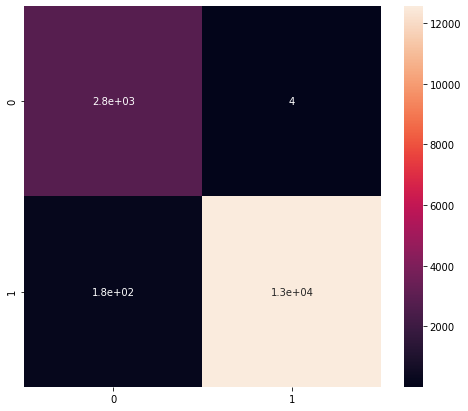

In [ ]:
# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (8, 7))
sns.heatmap(cm, annot = True)

# step2 data analysis

## Plot word cloud

In [ ]:
pip install WordCloud

     |████████████████████████████████| 220 kB 2.1 MB/s eta 0:00:01
  Created wheel for WordCloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=160883 sha256=dbd2cce70a62a44dc2af82ec70a9bf31266d5713d205fb339c46d485826a98cb
  Stored in directory: /Users/liebig/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built WordCloud
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv("cleaned_data.csv")

In [ ]:
df['Clean_joined'] = df['Clean_joined'].astype(str)
df.head()

,Unnamed: 0,Label,LeftOrRight,Original,convert,Clean,Clean_joined
0,0,left,1,FDA still without a permanent leader as clock ...,FDA still without a permanent leader as clock ...,"['permanent', 'leader', 'clock', 'ticks', 'act...",permanent leader clock ticks acting head cnnpo...
1,1,left,1,Virginia's gubernatorial election is more impo...,Virginia's gubernatorial election is more impo...,"['virginias', 'gubernatorial', 'election', 'im...",virginias gubernatorial election important nat...
2,2,left,1,US Capitol Police whistleblower alleges leader...,US Capitol Police whistleblower alleges leader...,"['capitol', 'police', 'whistleblower', 'allege...",capitol police whistleblower alleges leadershi...
3,3,left,1,US calls talks with Taliban 'candid and profes...,US calls talks with Taliban 'candid and profes...,"['calls', 'talks', 'taliban', 'candid', 'profe...",calls talks taliban candid professional follow...
4,4,left,1,The Biden administration scramble to tame infl...,The Biden administration scramble to tame infl...,"['biden', 'administration', 'scramble', 'tame'...",biden administration scramble tame inflation c...


In [ ]:
# Downloading Stopwords
nltk.download("stopwords")
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','CNN','edu'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liebig/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


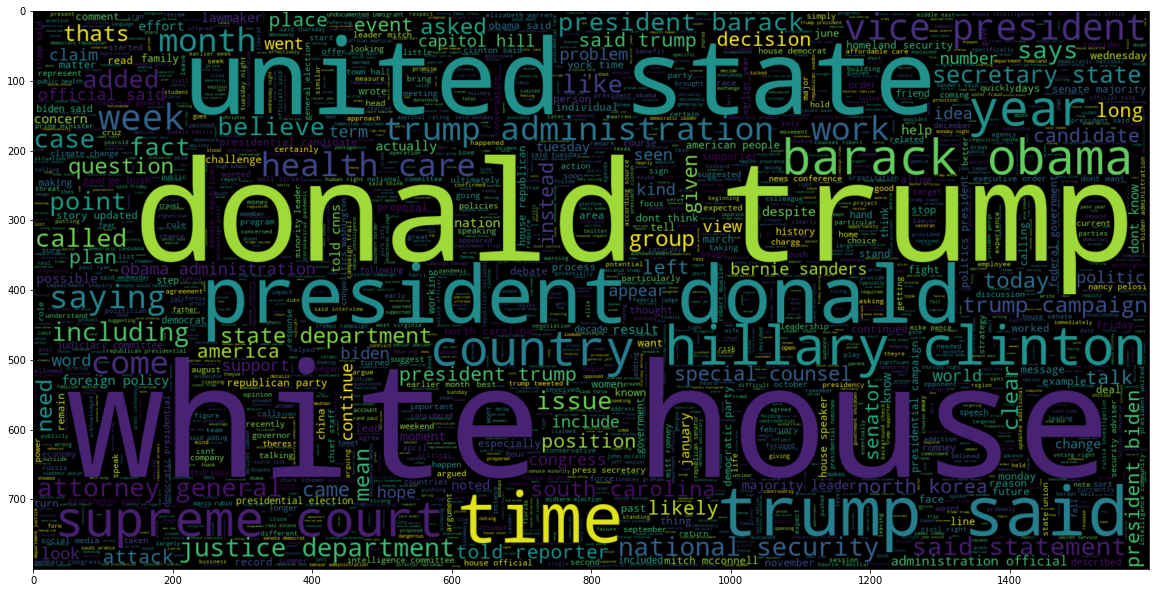

In [ ]:
# Plotting The Word Cloud For Text That Is left
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.LeftOrRight == 1].Clean_joined.astype(str)))
plt.imshow(wc, interpolation = 'bilinear')

## N-gram analysis

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/Drive', force_remount=True)
# When you run this block, you will need to click open a link to get some 
import os
#TODO
os.chdir('/content/Drive/My Drive/train')

Mounted at /content/Drive


In [3]:
import nltk, re, string, collections
import pandas as pd
from nltk.util import ngrams # function for making ngrams

df = pd.read_csv("two_data_2yr.csv")
df['X'] = df['X'].astype(str)
text = df['X'].to_list()
text = str(text)

# make sure it looks ok
# text[0:1000]

# first get individual words
tokenized = text.split()

# and get a list of all the tri-grams
esBigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the 50 most popular ngrams in this corpus?
esBigramFreq.most_common(50)

[(('the', 'White', 'House'), 22692),
 (('said', 'in', 'a'), 15957),
 (('one', 'of', 'the'), 13076),
 (('President', 'Donald', 'Trump'), 12639),
 (('the', 'United', 'States'), 11972),
 (('according', 'to', 'the'), 11180),
 (('as', 'well', 'as'), 10145),
 (('a', 'lot', 'of'), 8436),
 (('according', 'to', 'a'), 7954),
 (('the', 'end', 'of'), 7849),
 (('in', 'a', 'statement'), 7806),
 (('\\n', '\\n', 'The'), 6903),
 (('going', 'to', 'be'), 6761),
 (('the', 'Supreme', 'Court'), 6722),
 (('the', 'Trump', 'administration'), 6719),
 (('familiar', 'with', 'the'), 6387),
 (('part', 'of', 'the'), 6288),
 (('some', 'of', 'the'), 6055),
 (('the', 'Department', 'of'), 6033),
 (('be', 'able', 'to'), 5827),
 (('of', 'the', 'United'), 5746),
 (('out', 'of', 'the'), 5663),
 (('has', 'been', 'updated'), 5436),
 (('President', 'Joe', 'Biden'), 5391),
 (('to', 'be', 'a'), 5374),
 (('story', 'has', 'been'), 5219),
 (('in', 'the', 'United'), 5036),
 (('members', 'of', 'the'), 4876),
 (('the', 'number', 'of')

In [4]:
# first get individual words
tokenized = text.split()

# and get a list of all the tri-grams
esBigrams = ngrams(tokenized, 5)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the 50 most popular ngrams in this corpus?
esBigramFreq.most_common(50)

[(('story', 'has', 'been', 'updated', 'with'), 3574),
 (('has', 'been', 'updated', 'with', 'additional'), 2695),
 (('Centers', 'for', 'Disease', 'Control', 'and'), 2161),
 (('former', 'Vice', 'President', 'Joe', 'Biden'), 1876),
 (('the', 'NBC', 'News', 'app', 'for'), 1734),
 (('for', 'Disease', 'Control', 'and', 'Prevention'), 1410),
 (('Associated', 'Press', 'contributed', 'to', 'this'), 1378),
 (('did', 'not', 'immediately', 'respond', 'to'), 1368),
 (('Senate', 'Majority', 'Leader', 'Mitch', 'McConnell'), 1322),
 (('Secretary', 'of', 'State', 'Mike', 'Pompeo'), 1313),
 (('been', 'updated', 'with', 'additional', 'developments'), 1235),
 (('NBC', 'News', 'app', 'for', 'breaking'), 1217),
 (('News', 'app', 'for', 'breaking', 'news'), 1193),
 (('app', 'for', 'breaking', 'news', 'and'), 1178),
 (('\\nThis', 'story', 'has', 'been', 'updated'), 1172),
 (('House', 'press', 'secretary', 'Jen', 'Psaki'), 1138),
 (('in', 'the', 'wake', 'of', 'the'), 1135),
 (('said', 'in', 'a', 'statement', '

This section calculates the frequency of each 3-grams and 5-grams in our 
corpus and counts how often each is used.
The order that words are used in the text is not random. In English, for example, you can say "the red apple" but not "apple red the." The relationships between words in the text are very complex. 
N-grams means we can look at each pair (or triple, set of four, etc.) of words that occur next to each other. 
This is useful to understand the words that are more likely to appear together in our political bias corpus and help judge what kind of news is more likely to contain political bias in the classification task.
These co-occurring words are known as "n-grams," where "n" is a number saying how long a string of words you considered.
When n is larger, there is more restrictive information for the next word, so it has more excellent discrimination, but it is more sparse and has a larger number of n-grams. We show what are the 50 most popular 3-grams and 5-grams in our corpus.